# CMSE 201 Final Project 

#### CMSE 201 Final Project
### &#9989; Tri Khuc
### &#9989; Section_007
#### &#9989; 4/17//23

# ___The "GOAT" soccer player___

## Background and Motivation

Even though Cristiano Ronaldo and Lionel Messi’s career have reached their endings and both are having their own divergences, the echo of those beautiful memories will never fade away in the hearts of their fans. These two superstars have been the subject of discussions, arguments, and even conflicts among passionate crowds, but now, everyone stands on the same line to admire and enjoy the great works of Ronaldo and Messi once again. It might be something they will never see for decades or even centuries. Ronaldo is a genius who was born in Europe with the blood of the Portugal national team flowing in his veins. CR7 shines like a bright light for his younger teammates. Only with him on the field can make his teammates play with more fire, dedication, and sacrifice. Messi, however, represents the quintessence and essence of an unparalleled gift from god. His vision, skills, and intelligence in the game of soccer seemed unprecedented, leading to his conquer of the milestone so called by the press: "Completion of Soccer".

With the generalized career data of both players, this paper is the final comparison between Cristiano Ronaldo Dos Santos Aveiro and Lionel Andrés Messi. Who is the more complete player? Who is considered more successful in their career?


## Methodology

To determine who is the better player, multiple factors must be taken into consideration, including skill level, in-game statistics, performance consistency throughout time, and influence on teammates. Skill level is a crucial factor in determining which player is better than the other. Comparing the abilities of both players in various areas of the game, such as passing, dribbling, shooting, can help us to identify who has the superior skill set. Both Ronaldo and Messi have displayed extraordinary skills on the field over the years, but the question remains as to who has the edge. In-game statistics can also provide an important indication of a player's overall performance. By comparing their career statistics, including the number of goals, assists, dribbles made, and successful passes, we can gain insights into their contribution to their respective teams. 

Another important factor to consider is the consistency of each player's performance through out their career. A player who consistently performs well is more valuable to their team than a player who only performs well in certain games. This was also the factor that separated legends from super-stars. Therefore, it is crucial to analyze the career statistics of both Ronaldo and Messi over the years to determine which player has been more consistent throughout their career. Additionally, the influence each player has on their teammates should also be taken into account. A player who is able to motivate and inspire their teammates to perform at their best can make a significant impact on the success of the team as a whole. 

To take this analysis further, a machine learning model can be created to classify each player's position and playing style in recent years. By analyzing their recent performances, we can gain insights into their current strengths and weaknesses.

The stats of  Cristiano Ronaldo Dos Santos Aveiro and Lionel Andrés Messi will be set side by side using data visualization techniques. Intuition about each player strengths and weaknesses will be concluded base on what was captured or observed. The work was shown as bellow 

In [2]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting tools
import seaborn as sns#plotting tools
from scipy.optimize import curve_fit #Optimizing tools
from sklearn.linear_model import LogisticRegression #ML regression model
from sklearn.metrics import accuracy_score #ML accuracy calculate tools

## Datal loading, exploring, and preprocessing

#### &#9989; Career data for table visualization

The first dataset was the overal career statistics of the two players. A table was created for direct comparisions. This could provide a general view towards each player skill set against each other. 

In [3]:
#Data preprocessing
data_career = pd.read_excel('MvsR.xlsx', sheet_name=4)
data_career=data_career.transpose() #Transpose for better table visualization
data_career.columns=data_career.iloc[0] #set new columns name
data_career.drop("Factors", axis=0, inplace=True) 
display(data_career)


Factors,All time Career Goals,Goal per Game,Assists,Games,Hat-tricks,Penalties,Free Kick Goals,Header,Shots,Shots on Target,Accuracy Shots on target,Dribbles,Passes,Chances Created,Man of the Match,Non-penalty Goals,Goals Contribution (G+A),Average match Rating
Messi,803.0,0.79,354.0,1018.0,57.0,108.0,62.0,26.0,2891.0,1370.0,47.4,3055.0,1358.0,403.0,312.0,695.0,1157.0,8.55
Ronaldo,832.0,0.72,236.0,1157.0,62.0,150.0,60.0,141.0,3488.0,1436.0,41.2,1661.0,904.0,176.0,172.0,682.0,1068.0,7.96


#### &#9989; Career data for graphing visualization

This was also the overal career statistics of the two players. Each columns' name was striped off unnecessary strings for better use. 2 additional row regarding goals scored composition by body parts was added to gave better knowledge about each player's unpredictablity when scoring. These data was also utilized for plotting later on.

In [5]:
#Data loading
data_all=pd.read_excel('MvsR.xlsx', sheet_name=4)
data_all.columns = data_all.columns.str.strip() #Strip unwanted texting character out of column name

#Add index 18: Strong foot goals
strong_foot_goal = pd.DataFrame({'Factors': 'Strong foot',  'Messi': 665, 'Ronaldo': 525}, index=[18])
data_all = data_all.append(strong_foot_goal)

#Add index 19: Weak foot goals
weak_foot_goal = pd.DataFrame({'Factors': 'Weak foot', 'Messi': 99,  'Ronaldo': 151}, index=[19])
data_all = data_all.append(weak_foot_goal)


display(data_all)

C:\Users\Dell\AppData\Local\Temp\ipykernel_22352\4172978364.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all = data_all.append(strong_foot_goal)
C:\Users\Dell\AppData\Local\Temp\ipykernel_22352\4172978364.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all = data_all.append(weak_foot_goal)


,Factors,Messi,Ronaldo
0,All time Career Goals,803.00,832.00
1,Goal per Game,0.79,0.72
2,Assists,354.00,236.00
3,Games,1018.00,1157.00
4,Hat-tricks,57.00,62.00
5,Penalties,108.00,150.00
6,Free Kick Goals,62.00,60.00
7,Header,26.00,141.00
8,Shots,2891.00,3488.00
9,Shots on Target,1370.00,1436.00


#### &#9989; Data of Goals and Assists by year

The second datasets was the goals scored and assists made by the two players in each year of their career. These data could be used to find each players' careers peak as well as to determined their performance consistency.

In [45]:
#Data processing 
data_by_year=pd.read_excel('MvsR.xlsx', sheet_name=0)
data_by_year.columns = data_by_year.columns.str.strip()
#data_by_year.head()

In [46]:
#Data processing 
data_goal_messi=pd.read_csv("datamessi.csv")
data_goal_messi.columns = data_goal_messi.columns.str.strip()
data_goal_messi['Playing_Position']=data_goal_messi['Playing_Position'].fillna(method='ffill') #Fill all null position with previous position
#data_goal_messi.head()

In [47]:
#Data processing 
data_goal_ronaldo=pd.read_csv("dataronaldo.csv")
data_goal_ronaldo.columns = data_goal_ronaldo.columns.str.strip()
data_goal_ronaldo['Playing_Position']=data_goal_ronaldo['Playing_Position'].fillna(method='ffill') #Fill all null position with previous position
#data_goal_ronaldo.head()

## ML model 

#### &#9989; Loading data from other players

In order to train the Machine Learning model to classified each players' playing style through out their career, a training dataset of other player was used. This dataset was the data performance of players in the top 6 leauges in the world in the 2021-2022 season. 

In [48]:
#Data processing 
data_train_pos = pd.read_csv("data_train_pos.csv", sep = ';', encoding = 'ISO-8859-1')
pd.set_option('display.max_columns', None)
data_train_pos['Pos'] = data_train_pos['Pos'].str[:2] #Remove all players' secondary position
#data_train_pos.head()


However, not all data was utilized. Because both Ronaldo and Messi spent most of their career playing in attacking positions, only relating data was saved to the result_data dataset for training. The number 1 represented the position "forward", and number 0 represent the position "midfield"

In [74]:
#Take only wanted result data
result_data = data_train_pos[['Player', '90s', 'Pos',"Goals",'SoT','PasTotCmp','Assists',"TouDef3rd","TouMid3rd","TouAtt3rd","TouAttPen","DriSucc%","MP"]]
result_data=result_data[(result_data['Pos'] == 'FW') | (result_data['Pos'] == 'MF')]
result_data.drop("Player",axis=1,inplace=True)

#Classifying player position by indexing them as 0 and 1
result_data['Pos'] = result_data['Pos'].replace({'FW': 1, 'MF': 0})
#result_data['PasTotCmp']=result_data['PasTotCmp']*result_data['MIN']/(90*result_data['90s'])
display(result_data)

,90s,Pos,Goals,SoT,PasTotCmp,Assists,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,DriSucc%,MP
2,27.4,0,0.04,0.18,55.90,0.00,22.70,41.8,10.90,0.62,64.3,31
3,32.8,0,0.00,0.21,40.70,0.06,13.70,40.3,11.60,0.46,64.6,34
4,0.5,1,0.00,0.00,4.00,0.00,0.00,10.0,18.00,6.00,0.0,1
5,8.1,1,0.00,0.49,11.10,0.12,3.46,15.6,15.60,3.83,33.3,24
6,1.1,1,0.00,0.00,7.27,0.00,1.82,10.0,10.90,2.73,50.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2916,28.8,0,0.07,0.35,43.20,0.03,17.00,39.8,7.26,1.08,62.5,36
2917,25.6,0,0.23,0.66,28.60,0.08,12.50,25.9,19.30,2.38,70.0,35
2918,30.9,0,0.23,0.68,43.90,0.13,7.18,30.5,26.90,2.33,52.4,36
2919,24.1,1,0.21,0.79,17.70,0.17,3.15,18.5,16.80,6.47,64.7,33


#### &#9989; Model training and testing on training dataset

A logistic regression model was used to classified players' position

In [76]:
X_train=np.array(result_data.drop("Pos",axis=1)) #Create input training data
Y_train=result_data["Pos"].values #Create output training data

# Train model using training data
lr_model = LogisticRegression() 
lr_model.fit(X_train, Y_train)

#Make prediction on training 
y_pred = lr_model.predict(X_train)
y_pred_proba = lr_model.predict_proba(X_train)

# Print accuracy
accuracy = accuracy_score(Y_train, y_pred)
print("Accuracy:", accuracy)

# Print the predicted probabilities 
print(y_pred_proba[:])

Accuracy: 0.8440698374473209
[[9.99429833e-01 5.70166942e-04]
 [9.88782334e-01 1.12176664e-02]
 [3.06773788e-02 9.69322621e-01]
 ...
 [7.71723470e-01 2.28276530e-01]
 [1.14547008e-01 8.85452992e-01]
 [4.76740535e-01 5.23259465e-01]]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy for this logistic regression model was 84%. 

#### &#9989; Making prediction

Data used for prediction from ronaldo and messi was loaded and ordered correctly to be fed into the model.

In [51]:
#Load and process all required data of Messi for position prediction
messi_standard=pd.read_csv("messi_standard.csv")
messi_shoot=pd.read_csv("messi_shoot.csv")
messi_pass=pd.read_csv("messi_pass.csv")
messi_possession=pd.read_csv("messi_possession.csv")
messi_data = pd.merge(messi_shoot[['Season','90s','Gls','SoT']], messi_pass[['Season', 'Cmp','Ast']], on='Season')
messi_data = pd.merge(messi_data, messi_possession[['Season','Def 3rd','Mid 3rd','Att 3rd','Att Pen','Succ%']], on='Season')
messi_data = pd.merge(messi_data,messi_standard[['Season','MP']])
messi_data = messi_data.dropna()
messi_data = messi_data.groupby('Season').mean()
messi_data

,90s,Gls,SoT,Cmp,Ast,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Succ%,MP
Season,,,,,,,,,,,
2017-2018,33.3,34.0,91.0,1544.0,12.0,47.0,1034.0,1351.0,250.0,72.0,36.0
2018-2019,30.1,36.0,82.0,1504.0,13.0,46.0,970.0,1343.0,164.0,59.8,34.0
2019-2020,32.0,25.0,63.0,1675.0,21.0,48.0,1132.0,1403.0,208.0,69.2,33.0
2020-2021,33.6,30.0,85.0,1954.0,9.0,64.0,1133.0,1687.0,211.0,64.4,35.0
2021-2022,23.9,6.0,29.0,1400.0,14.0,72.0,960.0,869.0,105.0,64.6,26.0
2022-2023,25.5,15.0,48.0,1328.0,14.0,85.0,953.0,950.0,136.0,55.5,26.0


In [52]:
#Load and process all required data of Ronaldo for position prediction
ronaldo_standard=pd.read_csv("ronaldo_standard.csv")
ronaldo_shoot=pd.read_csv("ronaldo_shoot.csv")
ronaldo_pass=pd.read_csv("ronaldo_pass.csv")
ronaldo_possession=pd.read_csv("ronaldo_possession.csv")
ronaldo_data = pd.merge(ronaldo_shoot[['Season','90s','Gls','SoT']], ronaldo_pass[['Season', 'Cmp','Ast']], on='Season')
ronaldo_data = pd.merge(ronaldo_data, ronaldo_possession[['Season','Def 3rd','Mid 3rd','Att 3rd','Att Pen','Succ%']], on='Season')
ronaldo_data = pd.merge(ronaldo_data,ronaldo_standard[['Season','MP']])
ronaldo_data = ronaldo_data.dropna()
ronaldo_data = ronaldo_data.groupby('Season').mean()
ronaldo_data

,90s,Gls,SoT,Cmp,Ast,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Succ%,MP
Season,,,,,,,,,,,
2017-2018,25.4,26.0,72.0,615.0,5.0,44.0,350.0,707.0,237.0,60.80,27.0
2018-2019,29.9,21.0,62.0,915.0,8.0,79.0,540.0,893.0,196.0,52.90,31.0
2019-2020,32.4,31.0,67.0,1052.0,5.0,74.0,638.0,1002.0,217.0,60.90,33.0
2020-2021,31.1,29.0,61.0,838.0,2.0,61.0,589.0,805.0,197.0,61.10,33.0
2021-2022,13.8,9.0,19.5,367.0,1.5,51.5,254.0,290.0,86.0,81.25,15.5
2022-2023,7.9,6.0,13.5,121.0,0.0,25.0,91.0,106.0,32.0,44.40,10.0


In [53]:
#Predict messi position
messi_data=np.array(messi_data)
messi_playstyle=lr_model.predict_proba(messi_data)
messi_playstyle

array([[3.99680289e-15, 1.00000000e+00],
       [2.43578269e-09, 9.99999998e-01],
       [7.83310313e-04, 9.99216690e-01],
       [6.65203649e-05, 9.99933480e-01],
       [1.00000000e+00, 3.59137270e-22],
       [1.00000000e+00, 1.33036426e-12]])

In [54]:
#Predict ronaldo position
ronaldo_data=np.array(ronaldo_data)
ronaldo_playstyle=lr_model.predict_proba(ronaldo_data)
ronaldo_playstyle

array([[0.00000000e+00, 1.00000000e+00],
       [2.70228284e-13, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [1.59862570e-02, 9.84013743e-01],
       [9.57086668e-03, 9.90429133e-01]])

## Data visualization and model validation

The cell below showed the scoring data of Ronaldo and Messi side by side using grouped bar plot. These stats included games playerd, all time career goals, hat-tricks, penalties scored, total shots, total shots on target, and shooting accuracy. This gave a better visual comparision between the two players shooting abilities

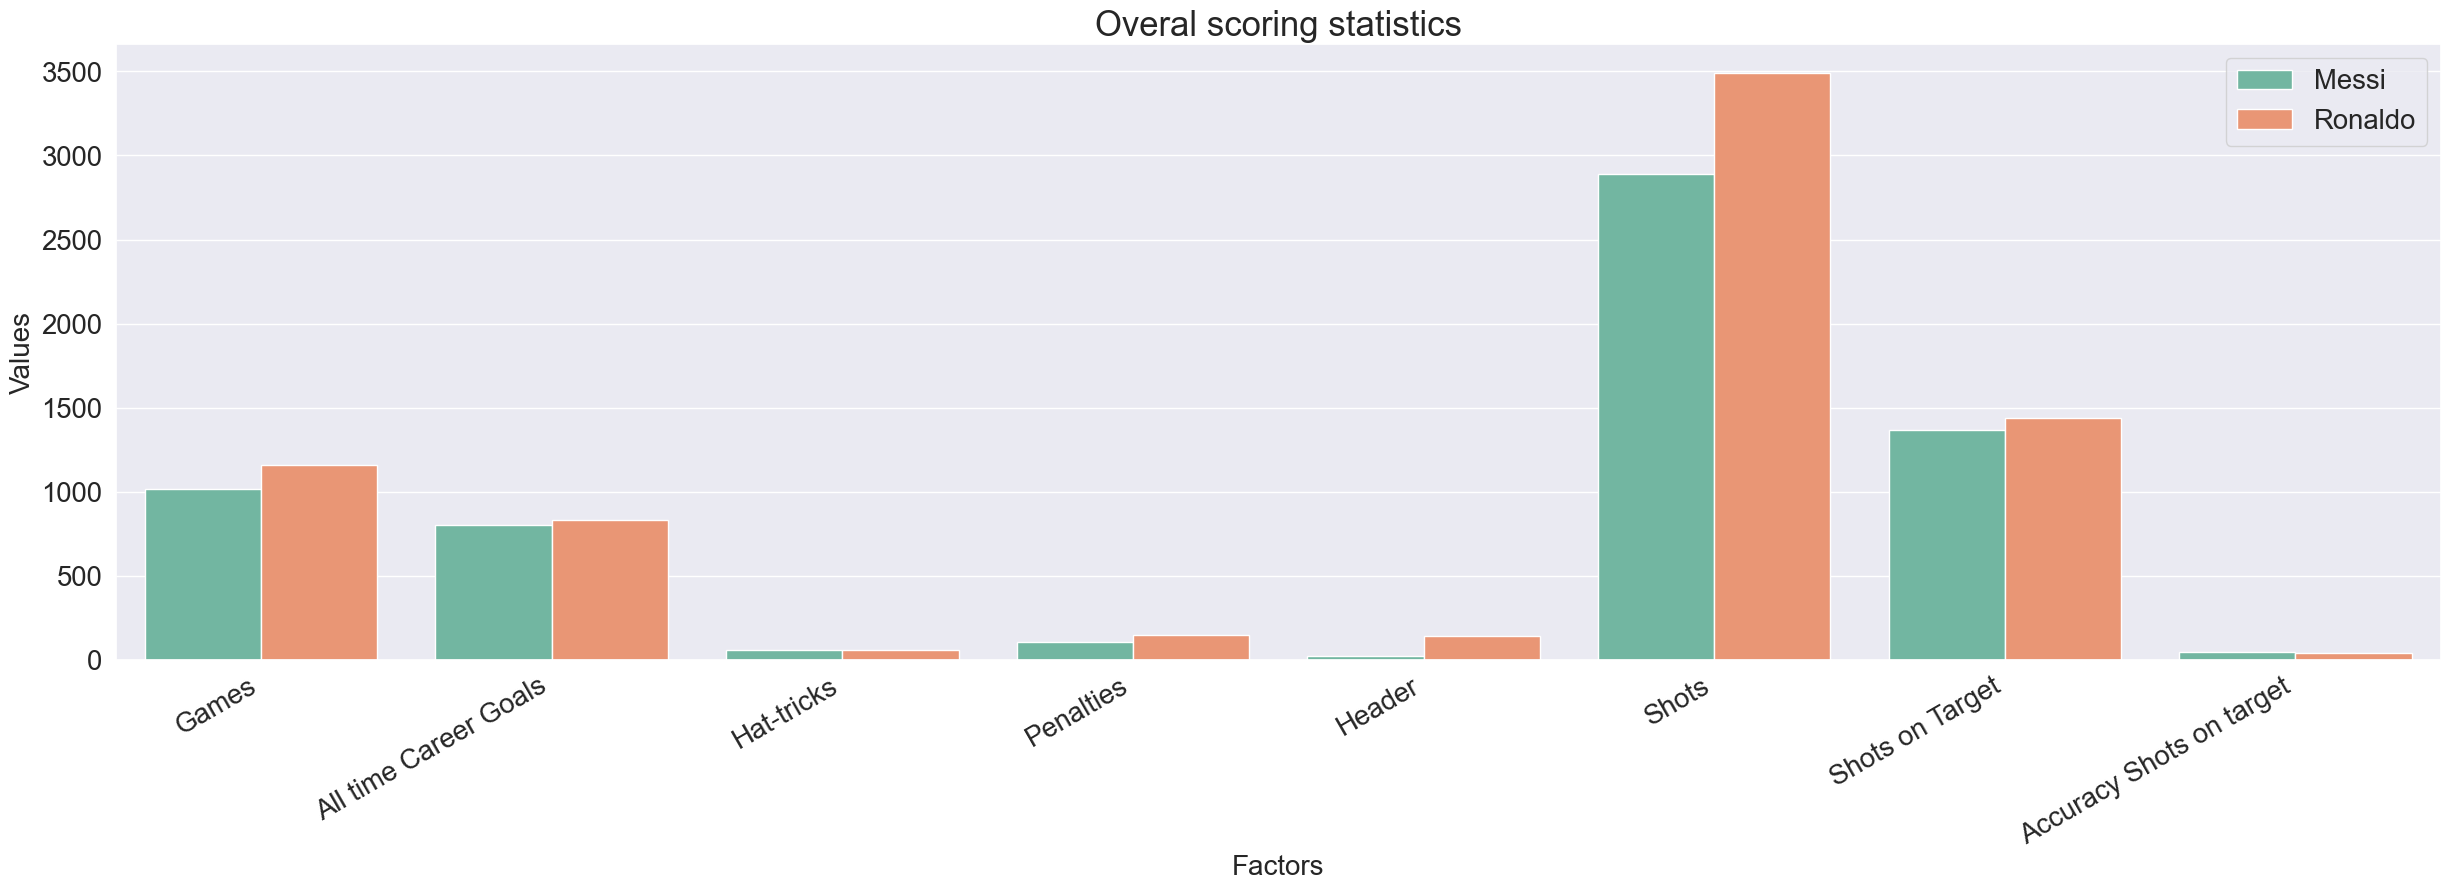

In [77]:
#Load only scoring related data

data_score = pd.melt(data_all.loc[[3,0,4,5,7,8,9,10]], id_vars=['Factors'], var_name='', value_name='val')

#Set figure style and size
plt.figure(figsize = (30, 8))
sns.set(font_scale=1.8)

#Plot using seaborn
sns.set_palette('Set2')
sns.barplot(x='Factors', y='val', hue='', data=data_score,)
plt.title('Overal scoring statistics', fontsize=25)
plt.xlabel('Factors', fontsize=20)
plt.xticks(rotation = 30, ha = 'right')
plt.ylabel('Values', fontsize=20)

plt.show()

The cell below showed the playmaking data of Ronaldo and Messi side by side using grouped bar plot. These stats included games playerd, assists, free kick goals, dribbles, passes, chance created, non penalty goals. This gave a better visual comparision between the two players playmaking abilities

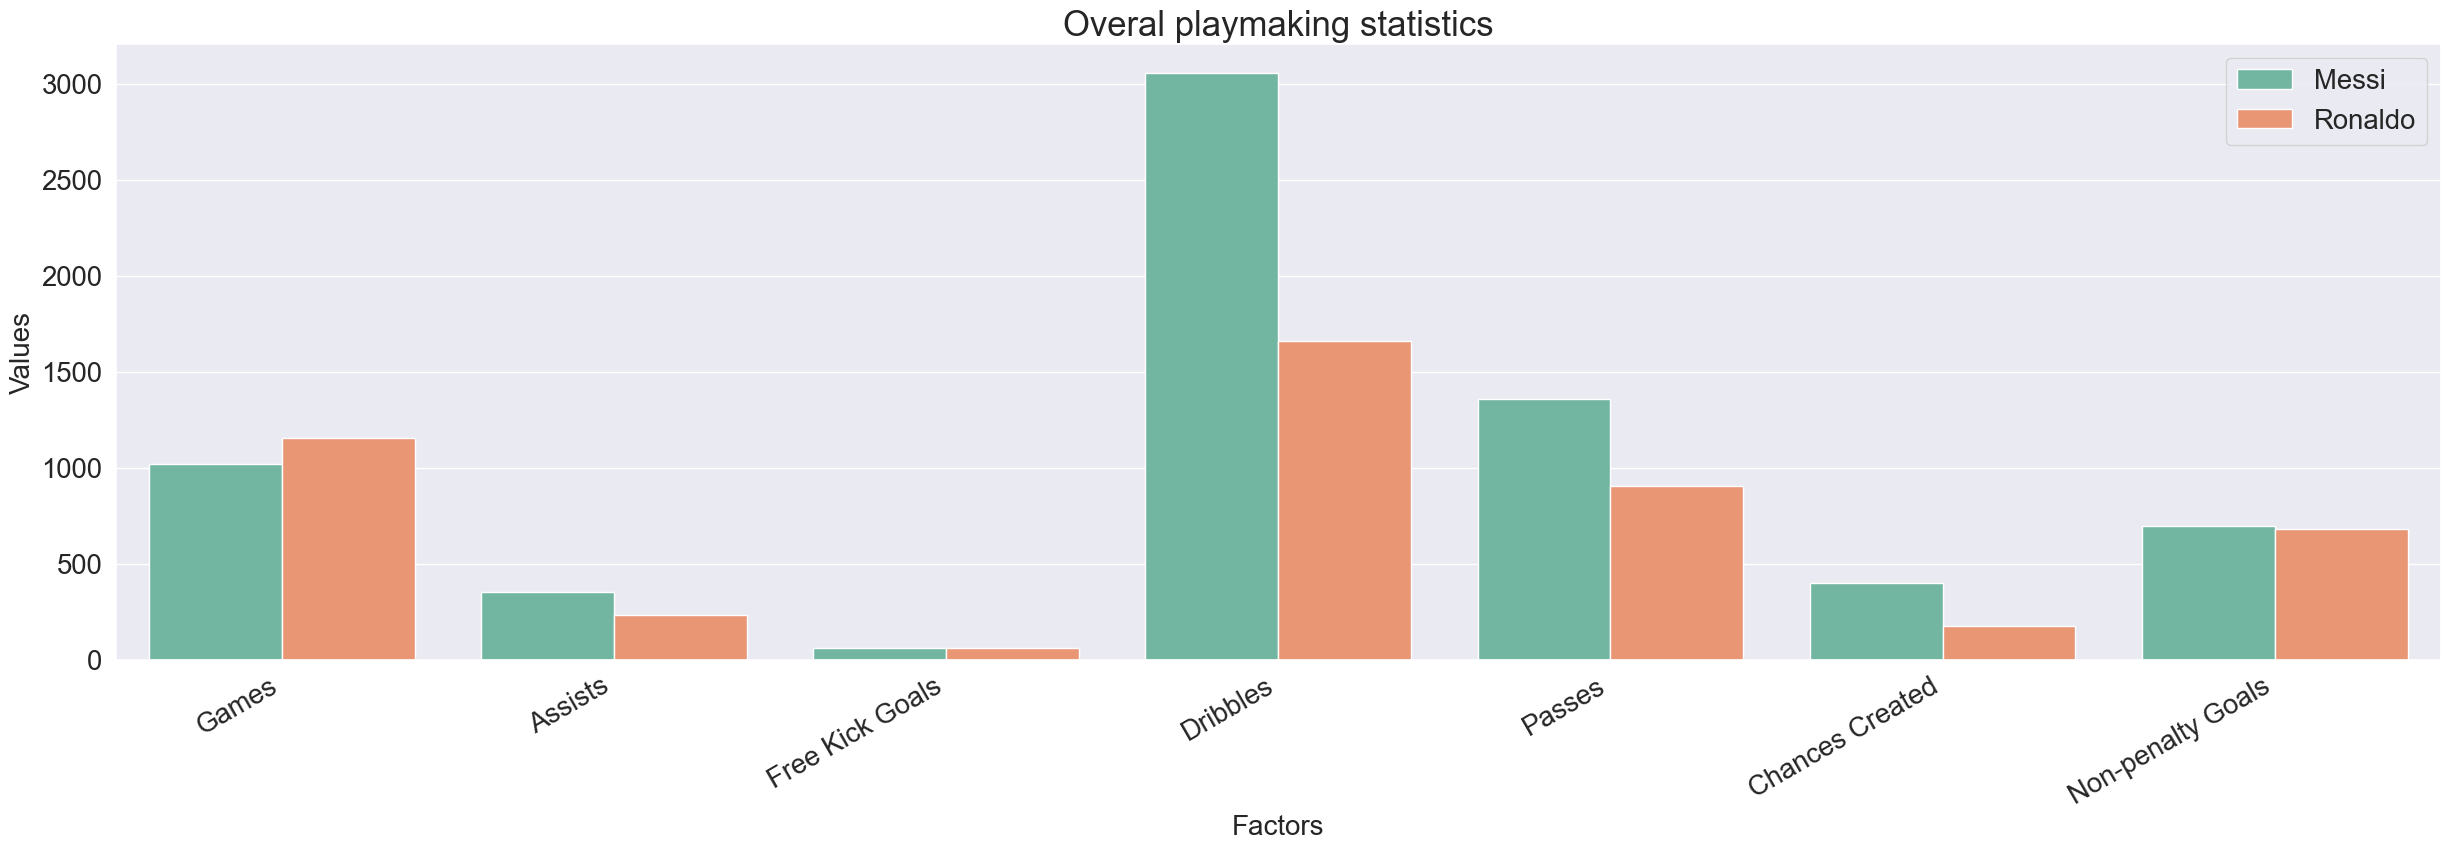

In [78]:
#Load only playmaking related data
data_playmake = pd.melt(data_all.loc[[3,2,6,11,12,13,15]], id_vars=['Factors'], var_name='', value_name='val')

#Set figure style and size
plt.figure(figsize = (30, 8))
sns.set(font_scale=1.8)

#Plot using seaborn
sns.set_palette('Set2')
sns.barplot(data=data_playmake, x='Factors', y='val', hue='')
plt.title('Overal playmaking statistics', fontsize=25)
plt.xlabel('Factors', fontsize=20)
plt.xticks(rotation = 30, ha = 'right')
plt.ylabel('Values', fontsize=20)

plt.show()

The cell below showed the comparisions of Ronaldo and Messi goals contribution composition in percentage. 

Text(0.5, 1.0, "Cristiano Ronaldo's goals contribution composition")

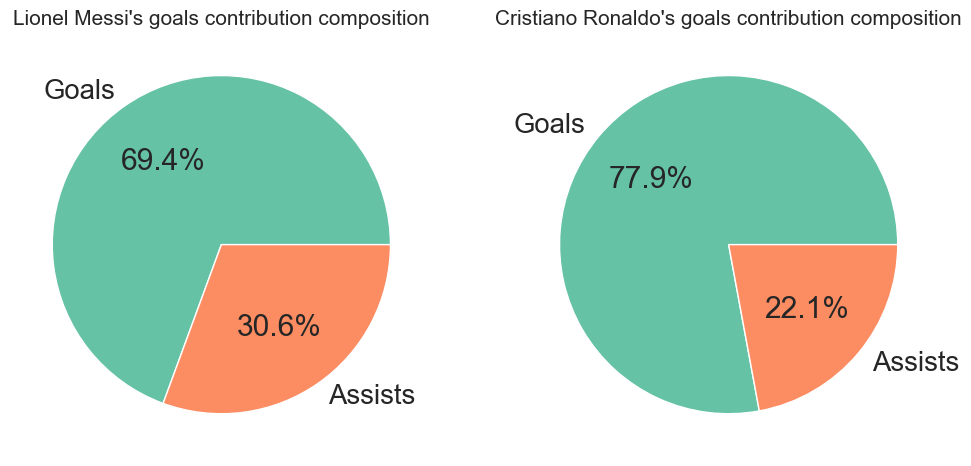

In [57]:
#Plot by pie
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 12))
sns.set_palette('Set2')

labels = 'Goals', 'Assists'
sizes = [data_all.iloc[0,1],data_all.iloc[2,1]]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.set_title("Lionel Messi's goals contribution composition",fontsize=15)

labels = 'Goals', 'Assists'
sizes = [data_all.iloc[0,2],data_all.iloc[2,2]]
ax2.pie(sizes, labels=labels, autopct='%1.1f%%')
ax2.set_title("Cristiano Ronaldo's goals contribution composition",fontsize=15)

In order to find the peak of each players' career, the scoring statistics of the two players was scatter plotted and optimized using the curve_fit function. This could gave the estimated point in which they had their best performance. The whole process was shown below.

In [58]:
# Define curve_fit input function
def func(x,a,b,c):
    return a*x**2+b*x+c # a polynomial function was used for optimization

In [59]:
#Finding fit parameter
ar=np.arange(2003,2024,1)
arr_messi= data_by_year['Messi Goals']
arr_ronaldo= data_by_year['Ronaldo Goals']

arr_messi = np.array(arr_messi.astype(int))[::-1]
arr_ronaldo = np.array(arr_ronaldo.astype(int))[::-1]

best_messi,m=curve_fit(func,ar,arr_messi)
best_ronaldo,r=curve_fit(func,ar,arr_ronaldo)

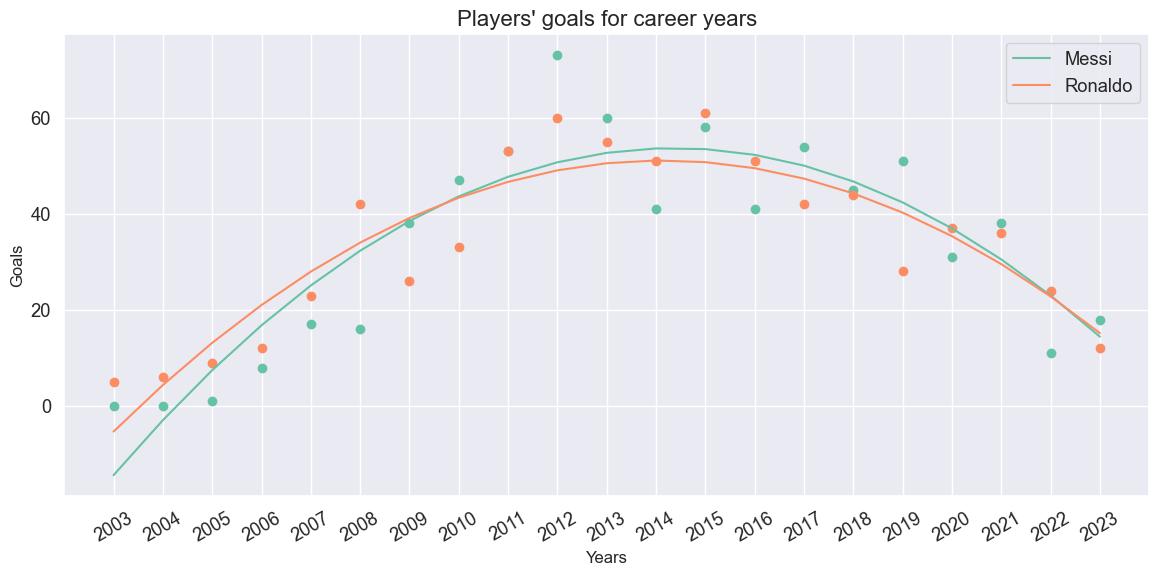

In [60]:
#Set plot style and size
plt.figure(figsize=(14,6))
sns.set(font_scale=1.2)
sns.set_palette('Set2')

#Plotting data and fit line
plt.scatter(ar,data_by_year["Messi Goals"].iloc[::-1])
plt.plot(ar,func(ar,best_messi[0],best_messi[1],best_messi[2]),label="Messi")

plt.scatter(ar,data_by_year["Ronaldo Goals"].iloc[::-1])
plt.plot(ar,func(ar,best_ronaldo[0],best_ronaldo[1],best_ronaldo[2]),label="Ronaldo")

plt.title("Players' goals for career years",fontsize=16)
plt.xlabel("Years",fontsize=12)
plt.ylabel("Goals",fontsize=12)
plt.xticks(np.arange(2003,2024,1),rotation = 30)
plt.legend()
plt.show()


The cell below showed the comparisions of the two players' goals scored by body parts.

Text(0.5, 1.0, "Players' goals scored composition")

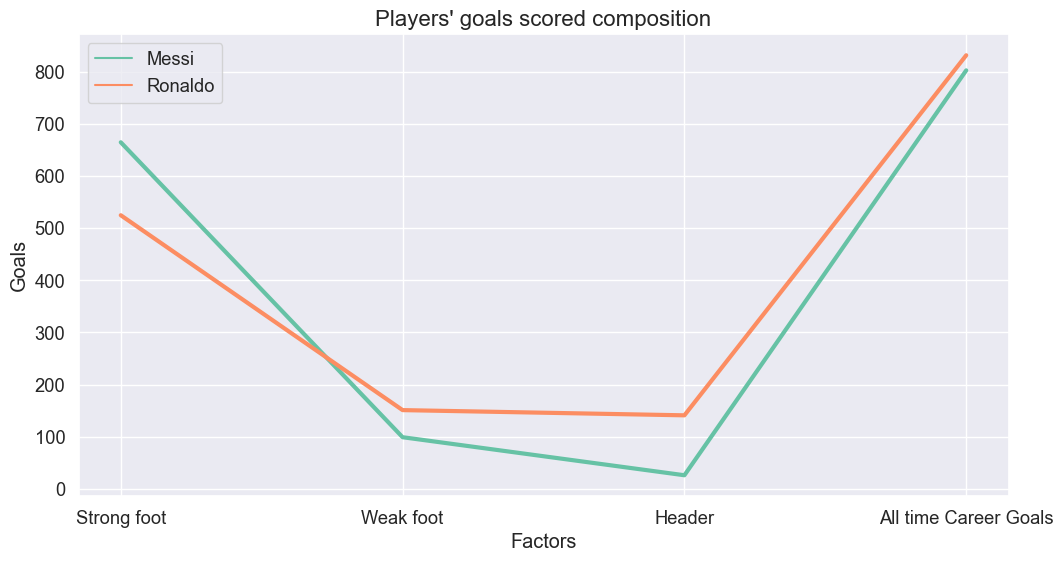

In [61]:
#Plot using seaborn
plt.figure(figsize=(12,6))
sns.set(font_scale=1.2)
sns.set_palette('Set2')
data_goal = pd.melt(data_all.loc[[18,19,7,0]], id_vars=['Factors'], var_name='', value_name='Goals')
sns.lineplot(x='Factors', y='Goals', hue='', data=data_goal, linewidth=3)
plt.title("Players' goals scored composition", fontsize=16)




## Optional facts

The cell below defined functions to estimate the two players explosiveness by generating additional numbers from the data loaded above such as the number of time their team actually won when they scored, their numbers of final goals, their numbers of goals scored during a comeback(when their team is loosing), and the number of opening goals.

In [62]:
#Functions for calculating players' explosiveness statistics
def count_win(data):
    win=0
    for i in range(len(data.iloc[:,7])):
        elements = data.iloc[i,7].split(":")  
        num1 = int(elements[0])
        num2 = int(elements[1])
        if num1>num2:
            win+=1
    return win

ronaldo_win_percent=(100*count_win(data_goal_ronaldo[data_goal_ronaldo['Result'].str.len()<6])/len(data_goal_ronaldo))
messi_win_percent=(100*count_win(data_goal_messi[data_goal_messi['Result'].str.len()<6])/len(data_goal_messi))

def count_final_goal(data):
    final=0
    for i in range(len(data.iloc[:,9])):
        elements=data.iloc[i,9].split("+")
        num=int(elements[0])
        if num>=88:
            final+=1
    return final

ronaldo_final_goal=(count_final_goal(data_goal_ronaldo))
messi_final_goal=(count_final_goal(data_goal_messi))

def count_comeback_goal(data):
    comeback=0
    for i in range(len(data.iloc[:,10])):
        elements = data.iloc[i,10].split(":")  
        num1 = int(elements[0])
        num2 = int(elements[1])
        if num2>=num1:
            comeback+=1
    return comeback

ronaldo_comeback_goal=(count_comeback_goal(data_goal_ronaldo))
messi_comeback_goal=(count_comeback_goal(data_goal_messi))

def count_first_goal(data):
    first=0
    for i in range(len(data.iloc[:,10])):
        if data.iloc[i,10]=="1:00":
            first+=1
    return first

ronaldo_opening_goal=(count_first_goal(data_goal_ronaldo))
messi_opening_goal=(count_first_goal(data_goal_messi))

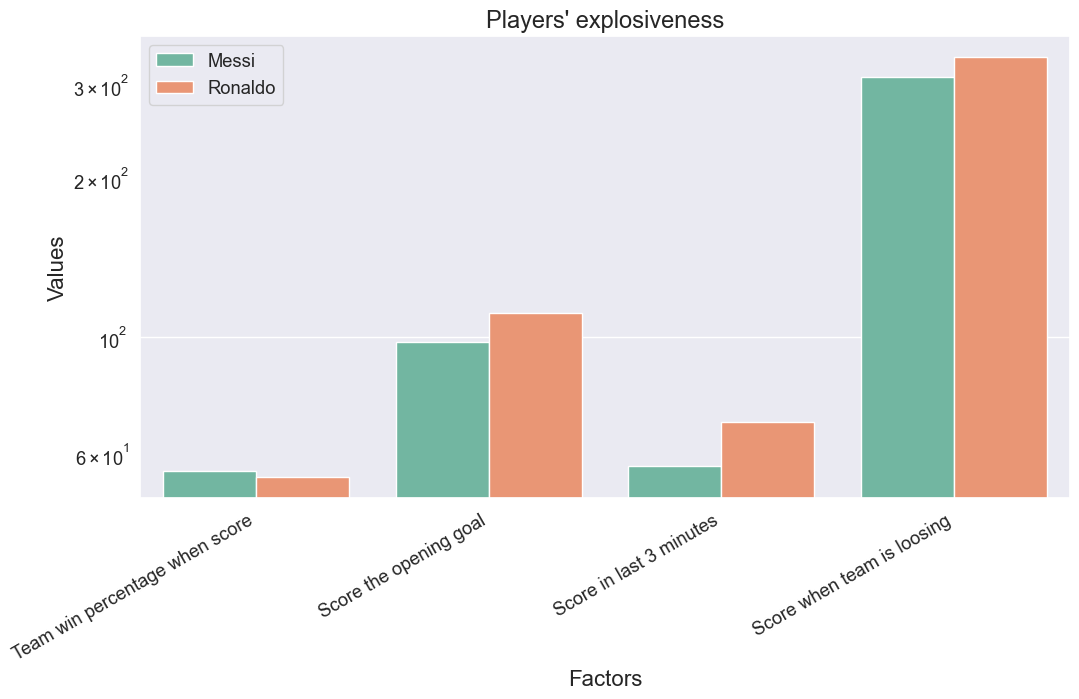

In [63]:
#Manually create data
data_effect = {
        'Factors': ["Team win percentage when score", "Score the opening goal","Score in last 3 minutes", "Score when team is loosing"],
        'Messi': [messi_win_percent, messi_opening_goal, messi_final_goal, messi_comeback_goal],
        'Ronaldo': [ronaldo_win_percent, ronaldo_opening_goal , ronaldo_final_goal, ronaldo_comeback_goal]}
data_effect = pd.DataFrame(data_effect)
data_effect= pd.melt(data_effect, id_vars=['Factors'], var_name='', value_name='val')
#Plotting using seaborn
plt.figure(figsize=(12,6))
sns.set(font_scale=1.2)
sns.set_palette('Set2')

sns.barplot(data=data_effect, x='Factors', y='val', hue='')
plt.title("Players' explosiveness", fontsize=17)
plt.xlabel('Factors', fontsize=16)
plt.xticks(rotation = 30, ha = 'right')
plt.ylabel('Values', fontsize=16)
plt.yscale('log')

plt.show()


## Results

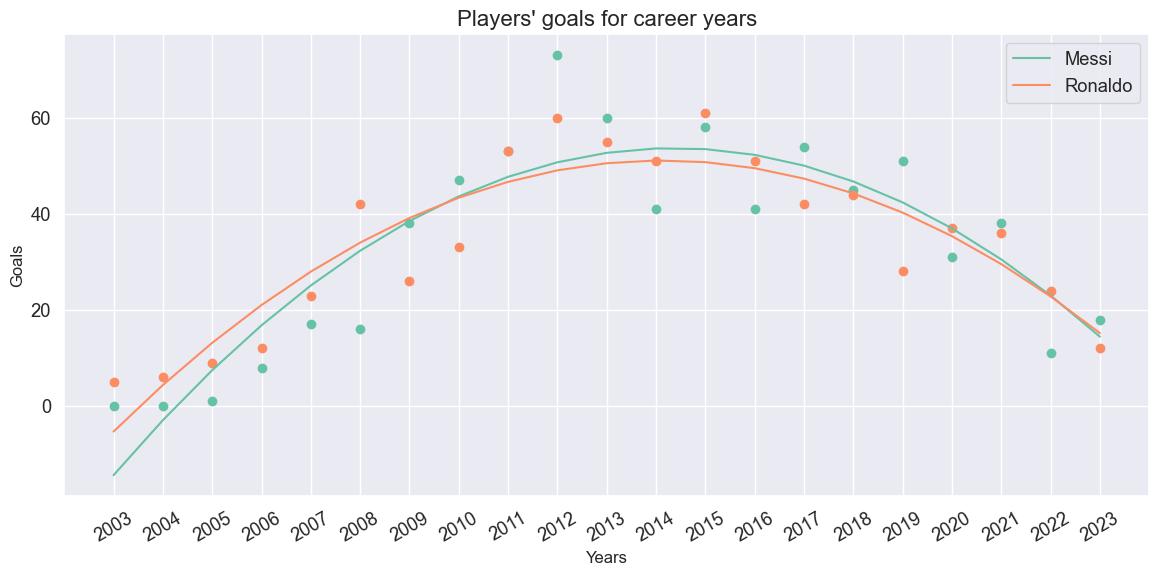

Messi career peak 2014.3678219554968
Ronaldo career peak 2014.1225583422085


In [64]:
#Set plot style and size
plt.figure(figsize=(14,6))
sns.set(font_scale=1.2)
sns.set_palette('Set2')

#Plotting data and fit line
plt.scatter(ar,data_by_year["Messi Goals"].iloc[::-1])
plt.plot(ar,func(ar,best_messi[0],best_messi[1],best_messi[2]),label="Messi")

plt.scatter(ar,data_by_year["Ronaldo Goals"].iloc[::-1])
plt.plot(ar,func(ar,best_ronaldo[0],best_ronaldo[1],best_ronaldo[2]),label="Ronaldo")

plt.title("Players' goals for career years",fontsize=16)
plt.xlabel("Years",fontsize=12)
plt.ylabel("Goals",fontsize=12)
plt.xticks(np.arange(2003,2024,1),rotation = 30)
plt.legend()
plt.show()
print("Messi career peak",-best_messi[1]/(2*best_messi[0]))
print("Ronaldo career peak",-best_ronaldo[1]/(2*best_ronaldo[0]))


The plot above showed that Ronaldo reach his career peak about 3 months earlier than Messi

In [68]:
#Predict messi position
messi_data=np.array(messi_data)
messi_playstyle=lr_model.predict(messi_data)

print("Messi playstyle for the last 5 years with 1 means a forward and 0 means a midfield: ",messi_playstyle)
#Predict ronaldo position
ronaldo_data=np.array(ronaldo_data)
ronaldo_playstyle=lr_model.predict(ronaldo_data)

print("Ronaldo playstyle for the last 5 years with 1 means a forward and 0 means a midfield: ",ronaldo_playstyle)


Messi playstyle for the last 5 years with 1 means a forward and 0 means a midfield:  [1 1 1 1 0 0]
Ronaldo playstyle for the last 5 years with 1 means a forward and 0 means a midfield:  [1 1 1 1 1 1]


The model predicted that while Ronaldo played as a forward for the last 6 years, Messi had 4 years as a forward and 2 recent years played almost like a midfielder

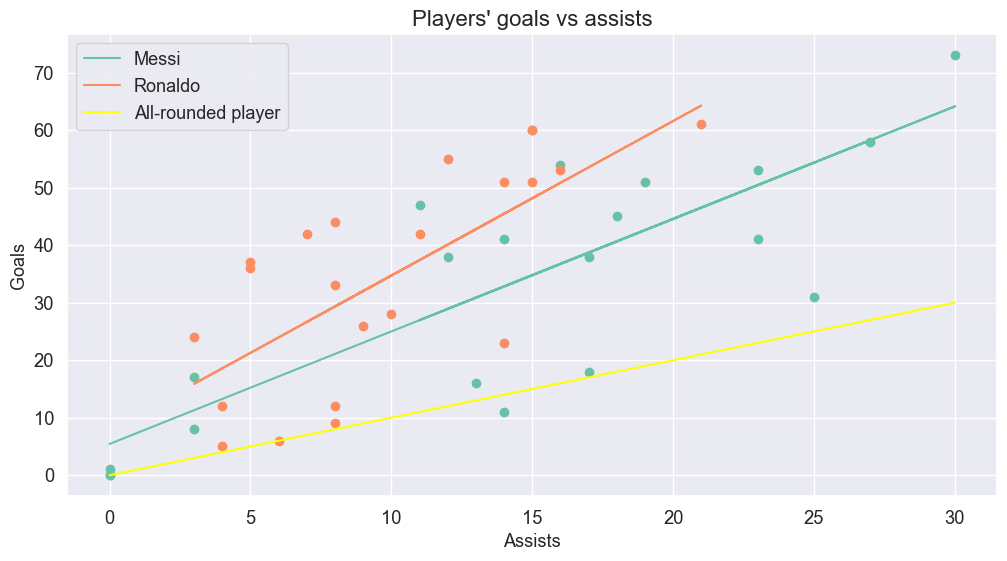

In [66]:
#Set plot style and size
plt.figure(figsize=(12,6))
sns.set(font_scale=1.2)
sns.set_palette('Set2')

#Plot by scatterplot
plt.scatter(data_by_year['Messi Assists'], data_by_year['Messi Goals'])
m, b = np.polyfit(data_by_year['Messi Assists'], data_by_year['Messi Goals'], 1)
plt.plot(data_by_year['Messi Assists'], m*data_by_year['Messi Assists']+b, label="Messi")

plt.scatter(data_by_year['Ronaldo Assists'], data_by_year['Ronaldo Goals'])
m, b = np.polyfit(data_by_year['Ronaldo Assists'], data_by_year['Ronaldo Goals'], 1)
plt.plot(data_by_year['Ronaldo Assists'], m*data_by_year['Ronaldo Assists']+b, label="Ronaldo")

x = np.linspace(0, 30, len(data_by_year))
plt.plot(x, x, color="yellow", label='All-rounded player')

plt.title("Players' goals vs assists", fontsize=16)
plt.xlabel("Assists", fontsize=13)
plt.ylabel("Goals", fontsize=13)
plt.legend(fontsize=13)

plt.show()



The plot above showed that Ronaldo was closer to a traditional striker, while Messi was closer to a playmaker based on their assists ad goals. However, Messi's stats was more even, and thus Messi is closer to an all-round player with both abilities to score goals and to assists

## Discussion and Conclusion

Ronaldo is known for his speed and athleticism. He's incredibly quick and agile on the pitch, which allows him to make incisive runs and explosive jumps. His aerial finishing skills plus his ability to shoot with both feet from longrange made hime an unpredictable threat around the 16 yards box. On the other hand, Messi is known for his incredible technical skills and ability to control the ball in tight spaces. He's a very well-rounded player who can create opportunities for himself and his teammates through his passing and dribbling abilities. The intelligence of Messi is something that pure statistics cannot fully capture. His touches, visions, and abilities to make game-changing decision in matter of seconds is phenomenal. Ronaldo is more of a striker while Messi is closer to an all-rounded player.

Though Ronaldo is 2 years older than Messi, and he reach his career peak about one year earlier than his counterparts (estimated around January 2014 compare to May 2014). While Messi have unprecedented scoring records, the statistics showed that Ronaldo seemed to be more consistence with his performance over years. He score more than 20 goals per season for 16 seasons straight, with a range of 37 goals, while Messi only has 13 seasons with 20 or more goals, with a range of 42 goals. Ronaldo capability to score goals in decisive momments of matches is the undeniable proof for his resilience, determination, and preservance. As evaluated by the Machine Learning model, even though both player started as a forward with nearly 100% predicted in 2017 to 2018, both experienced shifts as they reach the end of their career. While Ronaldo kept his playstyle and transfer to a less competitive leauge, Messi remained in the top leauge switching to play almost like a midfielder for the past 2 years.

### References

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. **Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_

Datas are taken from sources below.
Some of the codes are inspired / taken from sources below.

Sabirbagwan. “Messivsronaldoeda.” Kaggle, Kaggle, 16 Apr. 2023, https://www.kaggle.com/code/sabirbagwan/messivsronaldoeda.

Saha, Sandeep. “Cristiano Ronaldo Dominates Lionel Messi in an Unexpected Category: Goals Scored without Using His Feet.” Sportsmanor, 11 Jan. 2023, https://www.sportsmanor.com/soccer-cristiano-ronaldo-dominates-lionel-messi-in-an-unexpected-category-goals-scored-without-using-his-feet/#:~:text=Cristiano%20Ronaldo%20is%20considered%20a,the%20history%20of%20the%20game. 

Wasi, Azmine Toushik. “Cristiano Ronaldo: All Club Goals.” Kaggle, 16 Apr. 2023, https://www.kaggle.com/datasets/azminetoushikwasi/cr7-cristiano-ronaldo-all-club-goals-stats. 

Wasi, Azmine Toushik. “Lionel Messi: All Club Goals.” Kaggle, 16 Apr. 2023, https://www.kaggle.com/datasets/azminetoushikwasi/-lionel-messi-all-club-goals. 

“Lionel Messi Stats, Goals, Records, Assists, Cups and More.” FBref.com, https://fbref.com/en/players/d70ce98e/Lionel-Messi. 

“Cristiano Ronaldo Stats, Goals, Records, Assists, Cups and More.” FBref.com, https://fbref.com/en/players/dea698d9/Cristiano-Ronaldo. 

“2021-2022 Football Player Stats.” Kaggle, https://www.kaggle.com/datasets/vivovinco/20212022-football-player-stats. 